In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../../plankton'))

In [ ]:
import plankton as pl
import matplotlib.pyplot as plt
import numpy as np

: 

##### Load coordinate data:

In [3]:
import pandas as pd

data_folder='data/'
coordinate_file='coordinates.csv'
coordinate_columns=['X','Y','genes']

umpp=0.152  #resolution of the coordinates -> to convert to 1px/um

coordinates = pd.read_csv(os.path.join(data_folder,coordinate_file))



##### Load background image:

In [ ]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000

image_file='background.png'
image_resolution=umpp #um/px
image_downsampling=0.1 #downsample image to 10% resolution for faster plotting

bg = Image.open(os.path.join(data_folder,image_file),) 
bg = bg.resize((int(bg.width*image_downsampling),int(bg.height*image_downsampling)),Image.ANTIALIAS)
bg = np.array(bg.getdata()).reshape((bg.height,bg.width,-1)).sum(-1)

bgmap = pl.PixelMap(bg,upscale=1/image_downsampling/image_resolution)


In [4]:
sdata = pl.SpatialData(x_coordinates=coordinates[coordinate_columns[0]],
                       y_coordinates=coordinates[coordinate_columns[1]],
                       genes=coordinates[coordinate_columns[2]],
                        pixel_maps=[bgmap]) 

(<matplotlib.collections.PathCollection at 0x7fc7a4f04f70>, None, None)

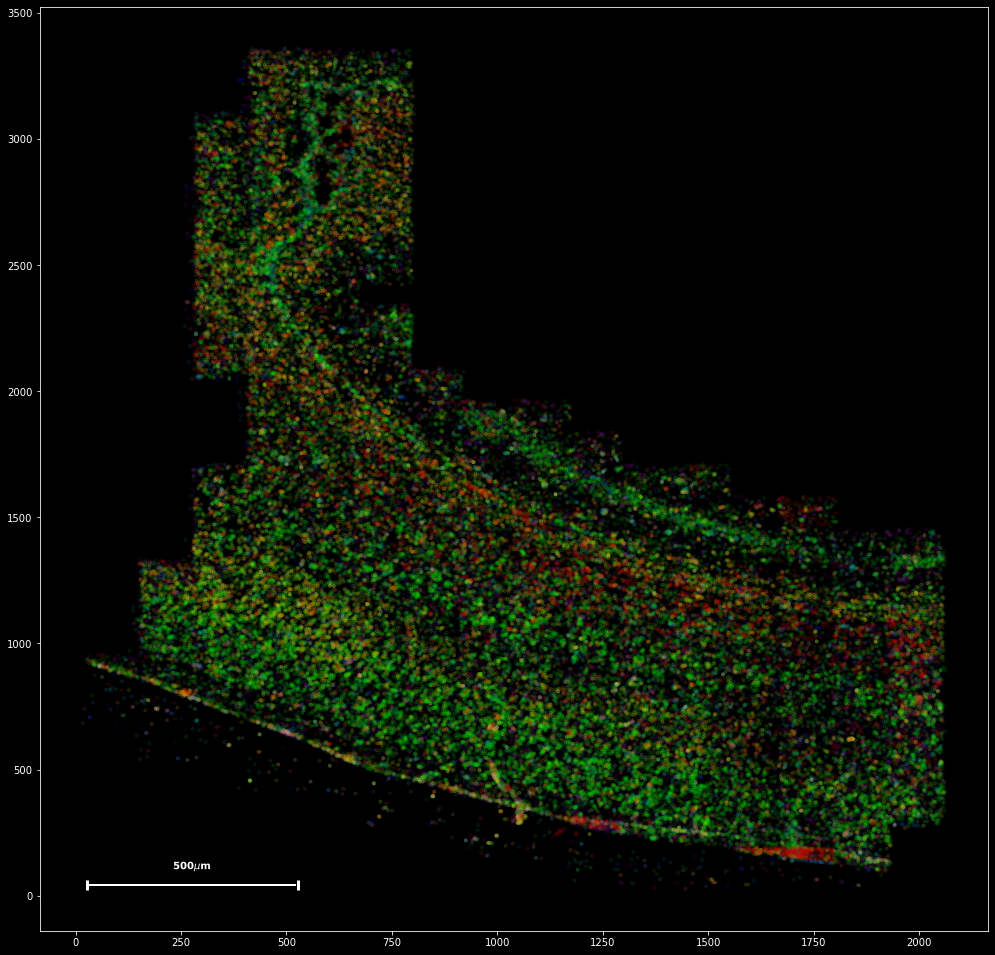

In [6]:
plt.figure(figsize=(17,17))
sdata.scatter(alpha=0.1,marker='.')

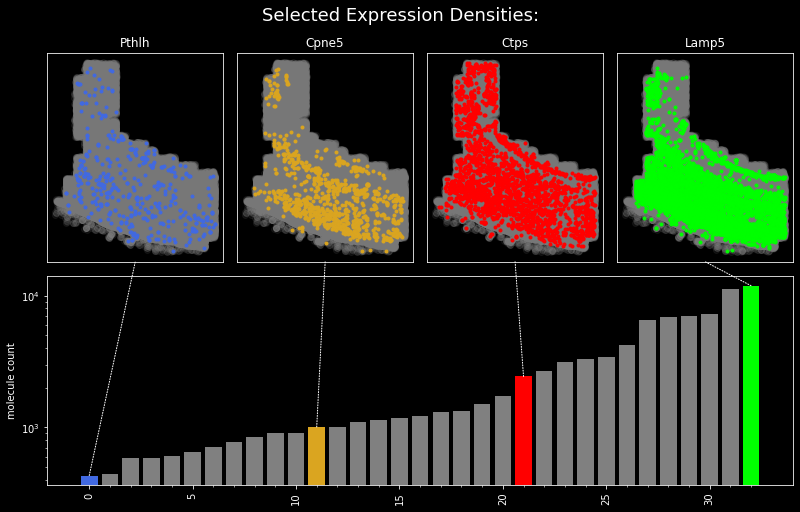

In [7]:
sdata.plot_overview()

In [16]:
knn_neighbors=250
bandwidth=20
n_neighbors=50
metric='euclidean'
min_dist=0.0
random_state=42
zero_weight=0

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)

